In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('dark')

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from sklearn import tree

In [4]:
data = pd.read_csv("mushrooms.csv")

In [5]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Attribute Information: 

1. **classes:** 
edible = e, poisonous = p

2. **cap-shape:** 
bell = b, conical = c, convex = x, flat = f, knobbed = k, sunken = s

3. **cap-surface:**
fibrous = f, grooves = g, scaly = y, smooth = s

4. **cap-color:**
brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y

5. **bruises:** 
yes = t, no = f

6. **odor:** 
almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s

7. **gill-attachment:** 
attached = a, descending = d, free = f, notched = n

8. **gill-spacing:** 
close = c, crowded = w, distant = d

9. **gill-size:** 
broad = b, narrow = n

10. **gill-color:** 
black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w ,yellow = y

11. **stalk-shape:** 
enlarging = e, tapering = t

12. **stalk-root:**
bulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?

13. **stalk-surface-above-ring:** 
fibrous = f, scaly = y, silky = k, smooth = s

14. **stalk-surface-below-ring:** 
fibrous = f, scaly = y, silky = k, smooth = s

15. **stalk-color-above-ring:** 
brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y

16. **stalk-color-below-ring:** 
brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y

17. **veil-type:** 
partial = p, universal = u

18. **veil-color:** 
brown = n, orange = o, white = w, yellow = y

19. **ring-number:** 
none = n, one = o, two = t

20. **ring-type:** 
cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z

21. **spore-print-color:** 
black = k, brown = n, buff = b, chocolate = h, green = r, orange = o,purple = u, white = w, yellow = y

22. **population:** 
abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y

23. **habitat:** 
grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d

In [6]:
data.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
data = data.drop("veil-type", axis=1)

In [8]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [9]:
#Define a function to use label encoding for each feature

def Label_enc(feature):
    LE = LabelEncoder()
    LE.fit(feature)   
    print(feature.name,LE.classes_) # printing each feature name with encoded classes 
    return LE.transform(feature)


In [10]:
# implementing label encoding to each column feature
for col in data.columns:
    data[str(col)] = Label_enc(data[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [11]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [12]:
x = data.drop(columns=["class"],axis=1)

In [13]:
y = data["class"]

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3)

In [15]:
rfc = RandomForestClassifier()

In [16]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [17]:
y_predict = rfc.predict(xtest)

In [18]:
rfc.score(xtest, ytest)

1.0

In [19]:
cm = confusion_matrix(y_predict, ytest)

In [20]:
cm

array([[1260,    0],
       [   0, 1178]], dtype=int64)

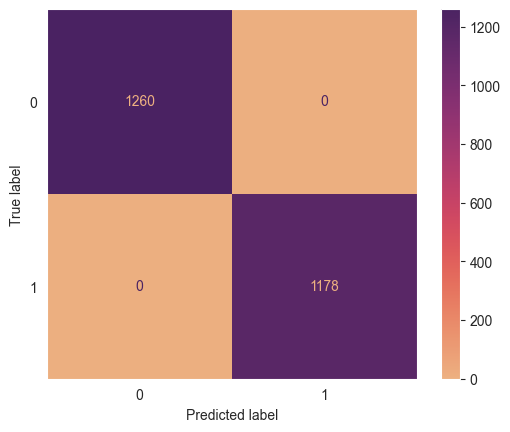

In [21]:
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_predict,ytest,labels=rfc.classes_),
                              display_labels=rfc.classes_)
cm.plot(cmap="flare")

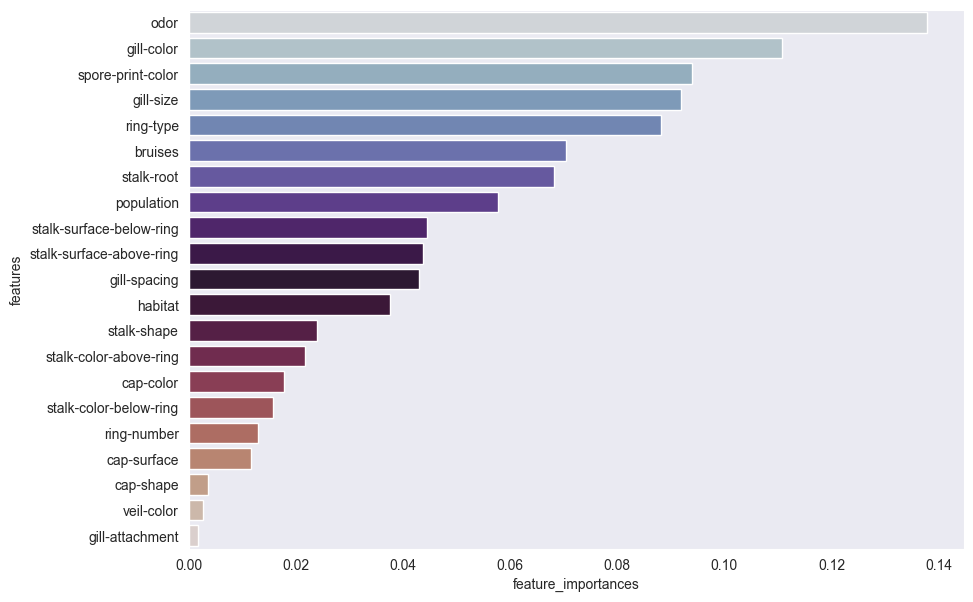

In [22]:
fi_df = pd.DataFrame({
    "feature_importances" : rfc.feature_importances_,
    "features" : x.columns
})

fi_df.sort_values(by="feature_importances", ascending=False, inplace=True)

plt.figure(figsize=(10,7))
sns.barplot(x="feature_importances", y="features", palette="twilight", data=fi_df)
plt.show()

In [34]:
decisiontree = tree.DecisionTreeClassifier()
decisiontree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [35]:
y_predict2 = decisiontree.predict(xtest)

In [37]:
decisiontree.score(xtest, ytest)

1.0